# Predicting with Time Series

Below, we review some of the basics in exploring and modeling with time series data.  Our data is from stock tickers for Amazon.  We will target predicting the **close** feature or closing price of the stock on a given date.



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
import statsmodels.tsa.api as smt
import statsmodels.api as sm

In [ ]:
amzn = pd.read_csv('AMZN_2006-01-01_to_2018-01-01.csv')

In [ ]:
amzn.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


### Question I: `to_ts_format`

In [ ]:
###GRADED
def to_ts_format(df):
    '''
    This function takes a DataFrame with a Date
    column.  We return a DataFrame with the Date feature
    as a datetime object and set to the index of the DataFrame.
    '''
    ###
    ### YOUR CODE HERE
    ###
    
    return pd.to_datetime(df)

In [ ]:
###
### IGNORE CELL
###


### Question 2: Closing Price by Month



In [ ]:
amzn = pd.read_csv('amzn_prepared.csv', index_col = 0, parse_dates = True)
amzn.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


In [ ]:
amzn.shape

(3019, 6)

In [ ]:
###GRADED
###QUESTION 2
###Compute the average Closing price by quarter.
###Save your results to the variable amzn_mean_close_by_quarter.
###HINT: Use the .resample() method.
amzn_mean_close_by_quarter = amzn.Close.resample('Q').mean()

###
### YOUR CODE HERE
###


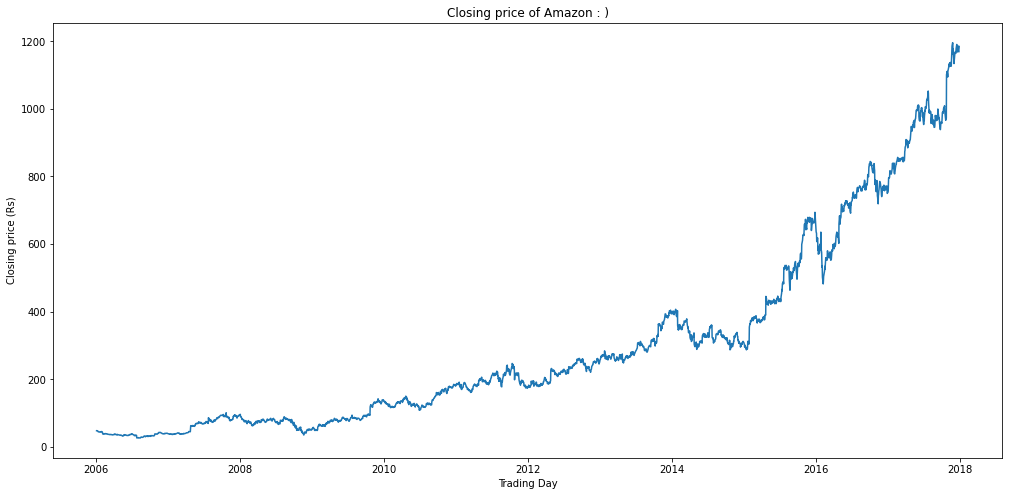

In [ ]:
plt.figure(figsize=(17, 8))
plt.plot(amzn['Close'])
plt.title('Closing price of Amazon : )')
plt.ylabel('Closing price (Rs)')
plt.xlabel('Trading Day')
plt.grid(False)
plt.show()

### Question 3: Moving Average

In [ ]:
def Moving_average(datacolumn,n):
  rolling_mean = datacolumn.rolling(window=n).mean()
  return rolling_mean

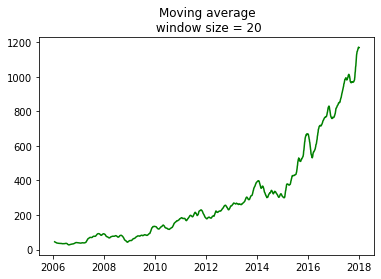

In [ ]:
###GRADED
amzn_20day_mvg_avg = amzn['MA_20'] = Moving_average(amzn.Close,20)
plt.title('Moving average\n window size = {}'.format(20))
plt.plot(amzn_20day_mvg_avg, 'g', label='Rolling mean trend')
plt.show()

In [ ]:
###
### IGNORE CELL
###


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
amzn.drop(['Name'], axis=1, inplace=True)

### Question 4:  Stationarity

![](amzn_autocorr.png)

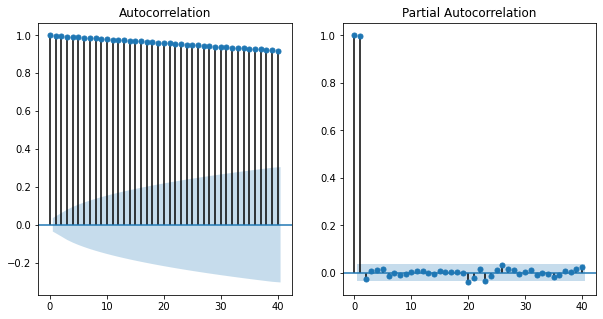

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
plot_acf(amzn['Close'], lags=40, ax=ax[0])
plot_pacf(amzn['Close'], lags=40, ax=ax[1])
plt.show()

In [ ]:
###GRADED
###QUESTION 4
###Based on the Autocorrelation plot of AMZN's closing
###prices, believe the time series is stationary.
###Assign a boolean answer to ans_4 below.
ans_4 = 'False'
###
### YOUR CODE HERE
###


In [ ]:
###
### IGNORE CELL
###


### Question 5: Augmented Dickey Fuller test



In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfuller(amzn.Close)[1]

1.0

In [ ]:
adfuller(amzn.Close.diff().dropna())[1]

1.098313993657182e-17

In [ ]:
###GRADED
###QUESTION 5
###Interpret  the results of the augmented Dickey-Fuller test
###by selecting all valid statements below.  Assign your solutions
###as strings in the list ans_5 (i.e. ans_5 = ['a', 'c']):
###a) We fail to reject the null hypothesis for the original series
###b) We reject the null hypothesis for the first difference of the original series
###c) neither the original or diff'd version of the series is stationary
###d) We fail to reject the null hypothesis that the first difference is stationary.
ans_5 = ['a', 'c']
###
### YOUR CODE HERE
###


In [ ]:
###
### IGNORE CELL
###


### Question 6: Train/Test Split

Below, we create a training and testing set for our models.  As discussed in the lectures, we want to create these splits in order rather than a random selection of observations.  For us, we will use data starting in **2016** for our training data, and the final ten days of data as our testing data.

In [ ]:
###GRADED
###Training Data starts in 2016
###Testing Data is last 10 observations in dataset.
###Both should be pandas series type indexed by date.
###The last date in train should be '2017-12-14'.
train =amzn.iloc[:3009,:]
test = amzn.iloc[3009:,:]
###
### YOUR CODE HERE
###
test.head()

,Open,High,Low,Close,Volume,MA_20
Date,,,,,,
2017-12-15,1179.03,1182.75,1169.33,1179.14,4778621,1161.4415
2017-12-18,1187.37,1194.78,1180.91,1190.58,2947625,1164.4765
2017-12-19,1189.15,1192.97,1179.14,1187.38,2587792,1167.5300
2017-12-20,1190.50,1191.00,1176.00,1177.62,2371166,1169.4365
2017-12-21,1175.90,1179.17,1167.64,1174.76,2123117,1170.3665


In [ ]:
###
### IGNORE CELL
###


### Question 7: Building the Autoregressive Model

Adjust the `ARIMA` instance below to build an autoregression model using your training data from **Question 6**.  This model should work on the first difference of the original closing price,  and use one prior term or an order 1 `AR` model.  

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
ar = ARIMA(train.Close, order = (0, 0, 0))
model = ar.fit() #fit the model here
###
### YOUR CODE HERE
###


In [ ]:
###
### IGNORE CELL
###


### Question 8: Making Predictions

In [ ]:
###GRADED
###QUESTION 8
###Use your fit model instance to generate a forecast for the 
###next 10 days closing prices.  (HINT: Use the .forecast() method!)
###Assign your solution as a series of predictions with appropriate index to ar_predictions below.
ar_predictions = model.predict(1,10)
###
### YOUR CODE HERE
###
ar_predictions

Date
2006-01-04    296.452114
2006-01-05    296.452114
2006-01-06    296.452114
2006-01-09    296.452114
2006-01-10    296.452114
2006-01-11    296.452114
2006-01-12    296.452114
2006-01-13    296.452114
2006-01-17    296.452114
2006-01-18    296.452114
dtype: float64

In [ ]:
###
### IGNORE CELL
###

In [ ]:
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 3009
Model:                     ARMA(0, 0)   Log Likelihood              -21178.720
Method:                           css   S.D. of innovations            275.757
Date:                Tue, 04 May 2021   AIC                          42361.439
Time:                        17:18:31   BIC                          42373.458
Sample:                             0   HQIC                         42365.762
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        296.4521      5.027     58.971      0.000     286.599     306.305


**Plotting Predictions**

![](predictions.png)

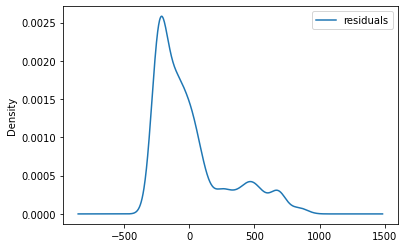

In [ ]:
residuals = pd.DataFrame(model.resid, columns=['residuals'])
residuals.plot(kind='kde')
plt.show()

### Question 9: MSE and RMSE

In [ ]:

###GRADED
###Question 9
###Compute the Mean Squared Error and 
###Root Mean Squared Error on the testing data.
mse =  mean_squared_error(test.Close,ar_predictions)
rmse = np.sqrt(mse)
###
### YOUR CODE HERE
###

In [ ]:
###
### IGNORE CELL
###


### Question 10: ARIMA Model

In [ ]:
###GRADED
###Question 10
###Adjust the ARIMA Model below to fit a model with 1 AR term
###on the first difference of the training data with 1 moving average term.
ar = ARIMA(train.Close, order = (1,1 ,1))
model = ar.fit() #fit the model here
###
### YOUR CODE HERE
###


In [ ]:
###
### IGNORE CELL
###


In [ ]:
ar_predictions = model.predict(1,10)
###
### YOUR CODE HERE
###
ar_predictions

Date
2006-01-04    0.374582
2006-01-05    0.362620
2006-01-06    0.385606
2006-01-09    0.362131
2006-01-10    0.365122
2006-01-11    0.350997
2006-01-12    0.375975
2006-01-13    0.356457
2006-01-17    0.384631
2006-01-18    0.351749
dtype: float64

### Question 11: Evaluating Results MSE and RMSE

In [ ]:
###GRADED
###QUESTION 11
###Use your fit ARIMA model to evaluate the Mean Squared Error
###and Root Mean Squared Error on the test dataset.
mse =  mean_squared_error(test.Close,ar_predictions)
rmse = np.sqrt(mse)
###
### YOUR CODE HERE
###

In [ ]:
###
### IGNORE CELL
###


### What's Next

As we saw in the lectures, these values for parameters `p, q`, and `d` might not be just right.  We would like to also consider some near values in the vicinity of our already tested.  You may want to run a grid search over some different parameters -- comparing the performance on predicting your test data.